In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1)
df = pd.read_csv('/content/insurance.csv')

In [4]:
# 2)
df.shape

(1338, 7)

In [5]:
# quantidade de linhas
df.shape[0]

1338

In [6]:
# quantidade de colunas
df.shape[1]

7

In [7]:
# 3)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# 4)
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
# 5)
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
# 6)
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
# 7)
for col in df:
  if col == 'bmi':
    continue
  else:
    print(col.upper())
    print(df[col].unique())   # a função .unique() mostra os dados únicos
  print()

AGE
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

SEX
['female' 'male']

CHILDREN
[0 1 3 2 5 4]

SMOKER
['yes' 'no']

REGION
['southwest' 'southeast' 'northwest' 'northeast']

CHARGES
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]



In [17]:
# 8)

df['age'].value_counts().sort_index()

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

In [18]:
# 9)

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Como podemos observar acima, não temos dados nulos em nenhuma coluna, pois o somatório de dados nulos foi zero em todas elas.

In [22]:
# 10)

df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Portanto, temos uma linha duplicada em todo o dataset.

In [23]:
# deletando a linha duplicada

df.drop_duplicates(inplace = True)

In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Vamos pesquisar pela linha duplicada

In [29]:
df.iloc[581]

age                39
sex              male
bmi             45.43
children            2
smoker             no
region      southeast
charges     6356.2707
Name: 582, dtype: object

Observe que agora os valors são diferentes dos anteriores duplicados, portanto a linha antiga foi deletada.

In [30]:
# 11)

df.select_dtypes('object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [31]:
# 12)

df.select_dtypes(include = ['int', 'float'] )

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [34]:
# 13)

colunas_numericas = df.select_dtypes(include = ['int', 'float'] ).columns

In [35]:
colunas_numericas

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [36]:
colunas_numericas = colunas_numericas.tolist()

In [37]:
colunas_numericas

['age', 'bmi', 'children', 'charges']

In [38]:
# 14)

colunas_categoricas = df.select_dtypes(include = 'object').columns

In [39]:
colunas_categoricas

Index(['sex', 'smoker', 'region'], dtype='object')

In [40]:
colunas_categoricas = colunas_categoricas.tolist()

In [41]:
colunas_categoricas

['sex', 'smoker', 'region']

In [42]:
# 15)
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [44]:
for col in colunas_categoricas:
  df[col] = df[col].astype('category')

In [46]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [49]:
# 16)
for col in colunas_categoricas:
  print(df[col].describe())
  print()

count     1337
unique       2
top       male
freq       675
Name: sex, dtype: object

count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object

count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object



In [50]:
# 17)
df[colunas_numericas].describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
# 18)
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [54]:
# 19)
df[df['age'] >= 62]

,age,sex,bmi,children,smoker,region,charges
11,62,female,26.290,0,yes,southeast,27808.72510
26,63,female,23.085,0,no,northeast,14451.83515
33,63,male,28.310,0,no,northwest,13770.09790
36,62,female,32.965,3,no,northwest,15612.19335
62,64,male,24.700,1,no,northwest,30166.61817
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
1265,64,male,23.760,0,yes,southeast,26926.51440
1301,62,male,30.875,3,yes,northwest,46718.16325
1321,62,male,26.695,0,yes,northeast,28101.33305


In [53]:
# 20)
df[df['age'] == 18]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075
...,...,...,...,...,...,...,...
1296,18,male,26.125,0,no,northeast,1708.92575
1315,18,male,28.310,1,no,northeast,11272.33139
1317,18,male,53.130,0,no,southeast,1163.46270
1334,18,female,31.920,0,no,northeast,2205.98080


In [58]:
# 21)
df.loc[df['region'] == 'southwest'].shape[0]

325

In [61]:
# 22)
df.sort_values(by = 'age', ascending = True)

,age,sex,bmi,children,smoker,region,charges
866,18,male,37.290,0,no,southeast,1141.44510
911,18,male,31.730,0,yes,northeast,33732.68670
1248,18,female,39.820,0,no,southeast,1633.96180
781,18,male,41.140,0,no,southeast,1146.79660
600,18,female,39.160,0,no,southeast,1633.04440
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
378,64,female,30.115,3,no,northwest,16455.70785
752,64,male,37.905,0,no,northwest,14210.53595
335,64,male,34.500,0,no,southwest,13822.80300


<Axes: >

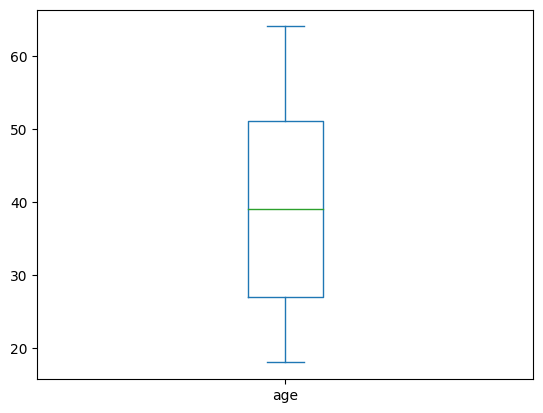

In [66]:
# 23)

df['age'].plot(kind = 'box')

<Axes: ylabel='Frequency'>

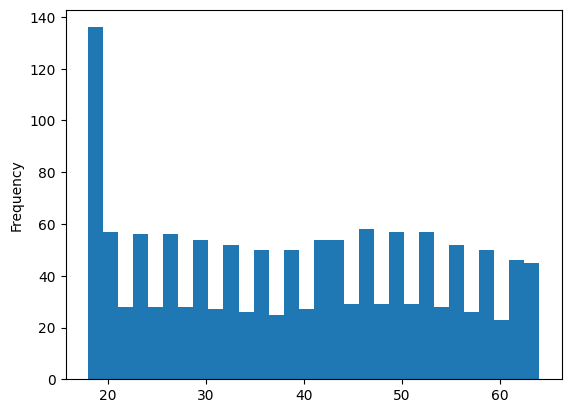

In [77]:
# 24)

df['age'].plot(kind = 'hist', bins = 30)